In [3]:
from scipy.optimize import minimize
import numpy as np
from math import factorial
import scipy 
import scipy.special as ssp
from scipy.optimize import minimize



import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
from numpy import sqrt, sin, cos, pi, log, histogram2d


from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

In [4]:
## Given values of constants in 
r = 0.52*10**(-4)
rho = 0.063
g = 980
T= 293
constant = 4*(np.pi)*(r**3)*rho*g/(3*T)

In [5]:
# Given values for z and n (z reported in cm)

zlist = [0 * 10**-4, 6* 10**-4, 12* 10**-4, 18* 10**-4]
nlist = [1880, 940, 530, 305]

z1, n1 = 0 * 10**-4, 1880
z2, n2 = 6* 10**-4, 940
z3, n3 = 12* 10**-4, 530
z4, n4 = 18* 10**-4, 305

In [6]:
# Log likelihood from (a) abbreviated as ln_L


def g(params):
    
    v0, k_b = params
    v = np.absolute(v0) # taking absolute value because log is not defined for -ve values
    # Physically too negative number of particles does not make sense (so can be thought of as a constraint)
    
    a = constant/k_b # a same as above
    
    t1 = -v*np.exp(-a*z1)+ (n1)*np.log(v) - (n1)*a*z1- (ssp.gammaln(n1+1))
    t2 = -v*np.exp(-a*z2)+ (n2)*np.log(v) - (n2)*a*z2- (ssp.gammaln((n2)+1))
    t3 = -v*np.exp(-a*z3)+ (n3)*np.log(v) -(n3)*a*z3-(ssp.gammaln((n3)+1))
    t4 = -v*np.exp(-a*z4)+ (n4)*np.log(v) -(n4)*a*z4- (ssp.gammaln((n4)+1))

    ln_L = t1 + t2 + t3 + t4
    return ln_L

# f just retruns the -ln_L
def f(params):
    x = - g(params)
    return x


In [9]:
# checking if it works for samples values 
f([35,72]), g([35,72])

(9184.88605371353, -9184.88605371353)

In [10]:
"""Scipy optimization to the values for max log_L
Here we find the minima of -log_L as we wish to maximize ln_L"""

initial_guess = np.asarray([1,1*10**(-15)])
result = minimize(f, initial_guess,
                  method = 'nelder-mead'
#                   method='L-BFGS-B'
#                   callback=store, # Store minimization steps
#                   options= {'gtol': 1E-20} # Tolerance for convergence
                  ) 
result

 final_simplex: (array([[1.84494456e+03, 1.19870245e-16],
       [1.84494450e+03, 1.19870247e-16],
       [1.84494453e+03, 1.19870241e-16]]), array([19.15901419, 19.15901419, 19.15901419]))
           fun: 19.159014186184095
       message: 'Optimization terminated successfully.'
          nfev: 270
           nit: 143
        status: 0
       success: True
             x: array([1.84494456e+03, 1.19870245e-16])

In [11]:
m_v, m_k_b = result.x
min_L = f(result.x)
min_L  # this is the min of -log_L

19.159014186184095

***
### <strong>Max $ln_{L}$ values: </strong> $k_b = 1.19870245\times 10^{-16} (cm^2g/s^2K)$ and $v_0 = 1849 $

***

## 3(c)

In [12]:
# source stack exchange: https://stackoverflow.com/questions/48168880/finding-the-center-of-a-contour

def contour_center(X):
    x = X[:,0]
    y = X[:,1]
    g = (x[:-1]*y[1:] - x[1:]*y[:-1])
    A = 0.5*g.sum()
    cx = ((x[:-1] + x[1:])*g).sum()
    cy = ((y[:-1] + y[1:])*g).sum()
    return 1./(6*A)*np.array([cx,cy])

In [14]:
# Create initial list of k_b and v_0 values (around the guess)

k_b = np.linspace(1.00*10**(-16),1.5*10**(-16),100)
v = np.linspace(1500,2200,100)

x,y = v, k_b
X,Y = meshgrid(x, y) # grid of point
params = [X, Y]

Z = f(params) # evaluation of the log_L function on the grid

## Contour plot of log likelihood

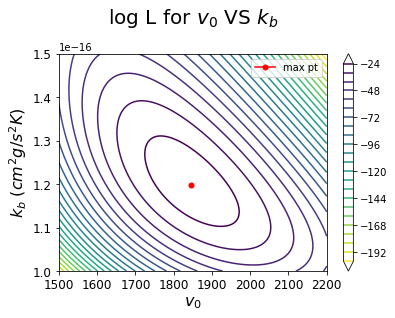

<Figure size 432x504 with 0 Axes>

In [27]:
# Plot of -ve log_L 
contour = plt.contour(X,Y,-Z, levels= 30,cmap = plt.cm.viridis_r, extend="both")
plt.colorbar()


point =   result.x
plt.plot(point[0],point[1], marker="o", markersize=5, color="red",label='max pt')

# label axis and plot
plt.title('log L for $v_0$ VS $k_b$\n', fontsize = 20)
plt.ylabel('$k_b$ $(cm^2g/s^2K)$', fontsize=16)
plt.xlabel('$v_0$', fontsize=16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

# plt.plot(result.x[0],result.x[1], 'r.', label='Max $ln L$')
plt.legend()
plt.figure(figsize=(6,7))
plt.tight_layout()
plt.show()

___ 
### Contour plot of -log likelihood is attached below after 3(c)
For the purpose of estimating uncertainites and the rest of the question we work with -log(L) due to it being positive 

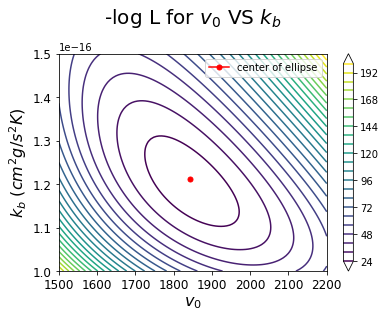

<Figure size 432x504 with 0 Axes>

In [29]:
# Plot of -ve log_L 
contour = plt.contour(X,Y,Z, levels= 30,cmap = plt.cm.viridis, extend="both")
plt.colorbar()

# center of the countour plot
point = contour_center(contour.allsegs[1][0])
plt.plot(point[0],point[1], marker="o", markersize=5, color="red",label='center of ellipse')

# label axis and plot
plt.title('-log L for $v_0$ VS $k_b$\n', fontsize = 20)
plt.ylabel('$k_b$ $(cm^2g/s^2K)$', fontsize=16)
plt.xlabel('$v_0$', fontsize=16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

# plt.plot(result.x[0],result.x[1], 'r.', label='Max $ln L$')
plt.legend()
plt.figure(figsize=(6,7))
plt.tight_layout()
plt.show()

## 3(c)

In [51]:
m_v, m_k_b = result.x
min_L = f(result.x)
min_L  # this is the min of -log_L

19.159014186184095

In [52]:
# Find 68% confidence interval on k_b
# using lnL_max - lnL(kb) = 1/2

In [53]:
logdiff = np.absolute(Z-min_L)

Text(0.5, 0, '$v_0$')

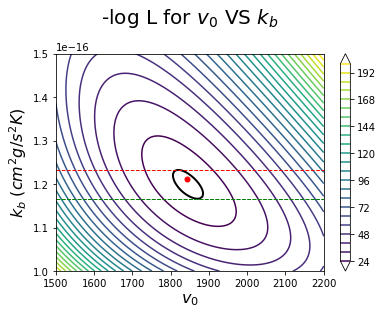

In [80]:
contour = plt.contour(X,Y,Z, levels= 30,cmap = plt.cm.viridis, extend="both")
plt.colorbar()

contourhalf= plt.contour(X,Y,logdiff, levels=[0.5],cmap = "gist_gray",linewidths=2)
point =   contour_center(contour.allsegs[1][0])

plt.plot(point[0],point[1], marker="o", markersize=5, color="red")
c = contourhalf
v = c.collections[0].get_paths()[0].vertices
x = v[:,0]
y = v[:,1]
a,b = y.max(), y.min()

p,q= np.where(y==a),np.where(y==b)
r,s = p[0],q[0]

plt.hlines(y[r],1500,2200,
            linewidth = 1, linestyle ="--", 
            color ='red') # red for l and r limits

plt.hlines(y[s],1500,2200,
            linewidth = 1, linestyle ="--", 
            color ='green') # red for l and r limits

plt.title('-log L for $v_0$ VS $k_b$\n', fontsize = 20)
plt.ylabel('$k_b$ $(cm^2g/s^2K)$', fontsize=16)
plt.xlabel('$v_0$', fontsize=16)

In [59]:
print("The interval for central 68 percent for kb is",y[s][0], "to", y[r][0])

The interval for central 68 percent for kb is 1.166422693501406e-16 to 1.2327031376289994e-16


In [62]:
m_v, m_k_b = result.x
m_k_b

1.198702446258201e-16

# Result

In [79]:
print('Boltzman constant 68% CI:\
{:.4} with left uncertainty -{:.4} and right uncertainty {:.4} (cm^2g/s^2K)'.format(result.x[1], result.x[1]-y[s][0], y[r][0]-result.x[1]))

Boltzman constant 68% CI:1.199e-16 with left uncertainty -3.228e-18 and right uncertainty 3.4e-18 (cm^2g/s^2K)


### Boltzman constant 68% CI 
$$ k_b = {1.199 \times 10^{-16}}^{ 3.4\times 10^{-18}}_{-3.2 \times 10^{-18}} (cm^2g/s^2K)$$


help(contourhalf)

# Extra: 3D Plot to visualize the max of log L

In [90]:
# https://dzone.com/articles/how-plot-function-two
    
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
from numpy import sin,sqrt

# fig = plt.figure()
# ax = fig.gca(projection='3d')
# surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
#                       cmap=cm.RdBu,linewidth=0, antialiased=False)

# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# fig.colorbar(surf, aspect=15)

# plt.show()

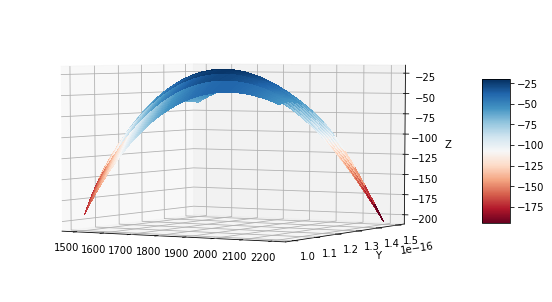

In [15]:
fig=plt.figure(figsize=(10,40))

# Set the bottom and top outside the actual figure limits, 
# to stretch the 3D axis
fig.subplots_adjust(bottom=2.9,top=3)

ax = fig.add_subplot(111, projection='3d')

# Change the viewing angle to an agreeable one
ax.view_init(4,None)


# surf= ax.plot_surface(X, Y, Z, zdir='z',cmap=plt.cm.magma)
surf= ax.plot_surface(X, Y, -Z,cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False, label=r"$ln_L$")
# ax._facecolors2d = ax._facecolor
# ax.legend()
# surf._facecolors2d = surf._facecolor3d
# surf._edgecolors2d = surf._edgecolor3d
# surf._facecolors2d=surf._facecolors3d
# surf._edgecolors2d=surf._edgecolors3dax.set_xlabel('X')

ax.set_ylabel('Y')
ax.set_zlabel('Z')
# fake2Dline = mpl.lines.xLine2D([0],[0], linestyle="none", c='b', marker = 'o')
fig.colorbar(surf, shrink=0.5, aspect=5)